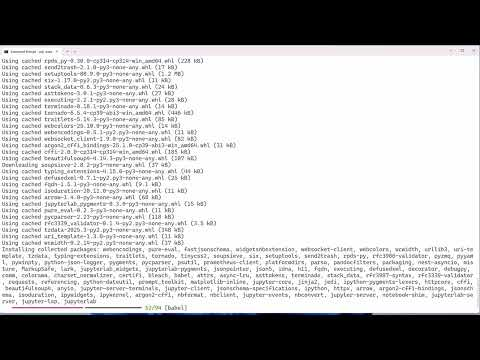

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('FxyiFFq88kU', width=960, height=540)

# Chatbots with OpenVINO GenAI

## Install dependencies

In [ ]:
!pip install openvino-genai huggingface-hub

## Download pre-converted and pre-optimized Large Language model

In [2]:
from huggingface_hub import snapshot_download

llm_output_dir = "models/qwen2"
snapshot_download("OpenVINO/Qwen2-1.5B-Instruct-int4-ov", local_dir=llm_output_dir, resume_download=True)

/home/adrian/repos/openvino_build_deploy/trainings/large_language_models/venv/lib/python3.13/site-packages/huggingface_hub/utils/_validators.py:186: UserWarning: The `resume_download` argument is deprecated and ignored in `snapshot_download`. Downloads always resume whenever possible.
  warnings.warn(


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

'/home/adrian/repos/openvino_build_deploy/trainings/large_language_models/models/qwen2'

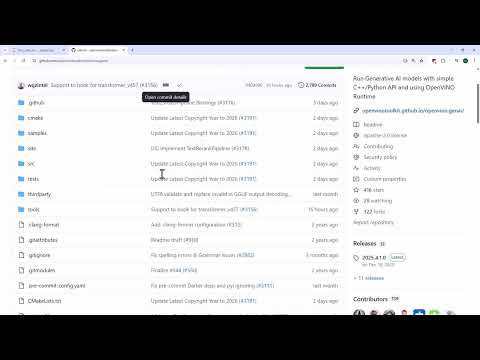

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('yrdfL2NAiHM', width=960, height=540)

## Query devices

In [4]:
import openvino as ov

core = ov.Core()
available_devices = core.available_devices

print(available_devices)
print([core.get_property(device, "FULL_DEVICE_NAME") for device in available_devices])

['CPU', 'GPU', 'NPU']
['Intel(R) Core(TM) Ultra 7 258V', 'Intel(R) Arc(TM) Graphics (iGPU)', 'Intel(R) AI Boost']


In [5]:
import ipywidgets as widgets

# Select the model type
device_dropdown = widgets.Dropdown(
    options=available_devices,
    value="GPU" if "GPU" in available_devices else "CPU",
    description="Inference device:"
)
device_dropdown

Dropdown(description='Inference device:', index=1, options=('CPU', 'GPU', 'NPU'), value='GPU')

## Run inference

In [6]:
import openvino_genai as ov_genai

llm_pipe = ov_genai.LLMPipeline(llm_output_dir, device_dropdown.value)

In [7]:
print(llm_pipe.generate("What is OpenVINO?"))

OpenVINO is an open-source software development kit (SDK) for machine learning developed by Intel Corporation. It provides a set of tools and libraries that can be used to build, train, deploy, and evaluate machine learning models on the Intel hardware platform.

The goal of OpenVINO is to make it easier for developers to create, train, and deploy machine learning models on Intel hardware. The SDK includes pre-built kernels and support for popular machine learning frameworks such as TensorFlow, Caffe, and ONNX.

OpenVINO is designed to work with Intel's Xeon Phi and Intel Iris Pro GPUs, as well as Intel Core processors. It also supports other platforms like ARM processors, but these features are not yet fully supported in all versions of the SDK.


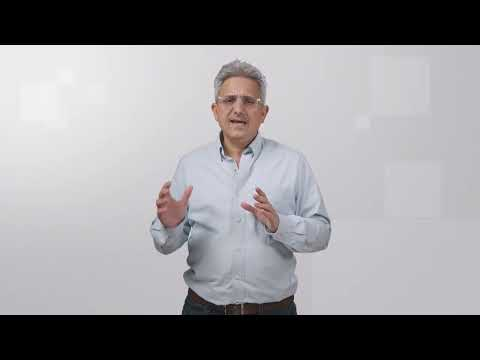

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo('qbXXxff9HU8', width=960, height=540)

### Stream the LLM output

In [9]:
config = ov_genai.GenerationConfig()
config.max_new_tokens = 1000
config.do_sample = True

prompt = "/no_think Write a poem about Intel"

In [10]:
def streamer(subword):
    print(subword, end='', flush=True)
    # Return flag corresponds whether generation should be stopped.
    return ov_genai.StreamingStatus.RUNNING

results = llm_pipe.generate([prompt], config, streamer)

Intel, in silicon shining,
An electronics giant indeed.
Redefining hardware's gentle path,
From blinding light to silent questions.

Microprocessors cease,
Cybernetik's recruiting space.
Intelligence flowering,
Through programming and speech.

Memory paths shifting,
ROM and RAM, in search of a swarm.
Data center's hegemony,
Compromising every realm.

Dramatic leaps developing,
In the semiconductor plan.
Gone the days of scarcity,
Nowhere to run, second-party sway.

Intel's vision, vast reflective,
One chip at a time, not a gap.
Nicheman, the IT legends bend,
Through IEEE's nod, passing through time.

Intel, the beacon burning bright,
On, on, Intel, let's hover.

## Measure the performance

In [7]:
perf_metrics = results.perf_metrics

print(f"Output token size: {perf_metrics.get_num_generated_tokens()}")
print(f"Load time: {perf_metrics.get_load_time():.2f} ms")
print(f"Generate time: {perf_metrics.get_generate_duration().mean:.2f} ± {perf_metrics.get_generate_duration().std:.2f} ms")
print(f"Tokenization time: {perf_metrics.get_tokenization_duration().mean:.2f} ± {perf_metrics.get_tokenization_duration().std:.2f} ms")
print(f"Detokenization time: {perf_metrics.get_detokenization_duration().mean:.2f} ± {perf_metrics.get_detokenization_duration().std:.2f} ms")
print(f"Time to first token (TTFT): {perf_metrics.get_ttft().mean:.2f} ± {perf_metrics.get_ttft().std:.2f} ms")
print(f"Time per output token (TPOT): {perf_metrics.get_tpot().mean:.2f} ± {perf_metrics.get_tpot().std:.2f} ms")
print(f"Throughput: {perf_metrics.get_throughput().mean:.2f} ± {perf_metrics.get_throughput().std:.2f} tokens/s")

Output token size: 315
Load time: 12705.00 ms
Generate time: 20111.44 ± 0.00 ms
Tokenization time: 14.55 ± 0.00 ms
Detokenization time: 0.11 ± 0.00 ms
Time to first token (TTFT): 1826.12 ± 0.00 ms
Time per output token (TPOT): 58.23 ± 2.47 ms
Throughput: 17.17 ± 0.73 tokens/s
